In [82]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [83]:
#read in merged cognitive and temperament data metrics
#data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS1_merged.csv")
#data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS2_merged.csv")
data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS1_merged.csv")
data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS2_merged.csv")
xgb_data_arms1 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/list_arms1_cog_data_with_arms2_xgb_model.csv")
xgb_data_arms2 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/list_arms2_cog_data_with_arms1_xgb_model.csv")

In [84]:
data_arms1

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,7
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,7
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,5
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,1
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,NDAR_INVZY8L7CT1,11851,47437,130,M,15,8,10,11,11,...,92,86,86,86,85,110,NaN,NaN,NaN,4
3333,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,119,100,94,103,65,110,93.0,113.0,104.0,2
3334,NDAR_INVZZ05KY5J,11860,47437,122,M,10,4,4,13,13,...,92,107,86,62,106,81,NaN,NaN,NaN,1
3335,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,101,80,94,95,79,90,83.0,96.0,87.0,4


In [85]:
data_arms1 = data_arms1.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
data_arms2 = data_arms2.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
xgb_data_arms1 = xgb_data_arms1.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
xgb_data_arms2 = xgb_data_arms2.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [86]:
data_arms2

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,120.0,88.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,4
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,131.0,78.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,1
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,153.0,83.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,5
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,109.0,97.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,6
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,120.0,116.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,112.0,101.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,5
3230,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,98.0,97.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,2
3231,NDAR_INVZZJ3A7BK,11868,47437,122,F,10,1,8,13,15,...,112.0,101.0,112.0,119.0,99.0,90.0,123.0,101.0,114.0,9
3232,NDAR_INVZZZ2ALR6,11873,47437,121,F,7,1,4,9,9,...,132.0,110.0,120.0,119.0,92.0,130.0,120.0,136.0,133.0,1


In [87]:
#filter dataframes to include only communities with more than 100 participants
communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]

In [88]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])
xgb_data_arms1.loc[:, 'community'] = pd.Categorical(xgb_data_arms1['community'])
xgb_data_arms2.loc[:, 'community'] = pd.Categorical(xgb_data_arms2['community'])

In [89]:
communities_more_than_100_arms2

Index([1, 2, 4, 3, 6, 5, 7], dtype='int64', name='community')

In [90]:
filtered_data_arms2.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_yea

In [91]:
data_arms2.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_yea

In [92]:
def se(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [93]:
print(filtered_data_arms1.dtypes)

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_yea

In [94]:
#calculate mean and standard error by community for ARMS1 and ARMS2
mean_and_se_by_community_arms1 = filtered_data_arms1.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in filtered_data_arms1.filter(regex='^(bis|upps|nihtbx).*').columns})
mean_and_se_by_community_arms2 = filtered_data_arms2.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in filtered_data_arms2.filter(regex='^(bis|upps|nihtbx).*').columns})

mean_and_se_xgb_arms2comm_arms1data = xgb_data_arms1.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in xgb_data_arms1.filter(regex='^(bis|upps|nihtbx).*').columns})
mean_and_se_xgb_arms1comm_arms2data = xgb_data_arms2.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in xgb_data_arms2.filter(regex='^(bis|upps|nihtbx).*').columns})

In [95]:
mean_and_se_by_community_arms2.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bas_drive.baseline_year_1_arm_1              mean    float64
                                                      se      float64
bis_y_ss_bas_fs.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bis_sum.baseline_year_1_arm_1                mean    float64
                                                      se      float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_sensation_

In [96]:
mean_and_se_xgb_arms1comm_arms2data.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bas_drive.baseline_year_1_arm_1              mean    float64
                                                      se      float64
bis_y_ss_bas_fs.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bis_sum.baseline_year_1_arm_1                mean    float64
                                                      se      float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_sensation_

In [97]:
#consolidate columns 
mean_and_se_by_community_arms1.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms1.columns.values]
mean_and_se_by_community_arms2.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms2.columns.values]
mean_and_se_xgb_arms2comm_arms1data.columns = ['_'.join(col).strip() for col in mean_and_se_xgb_arms2comm_arms1data.columns.values]
mean_and_se_xgb_arms1comm_arms2data.columns = ['_'.join(col).strip() for col in mean_and_se_xgb_arms1comm_arms2data.columns.values]

In [98]:
mean_and_se_xgb_arms1comm_arms2data.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_rr.baseline_year_1_arm_1_se                     float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_mean                float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_se                  float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_se                     float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_mean                  float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_se                    float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean        float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se          float64
upps_y_ss_sensation_seeking.baseli

In [99]:
mean_and_se_by_community_arms1.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_rr.baseline_year_1_arm_1_se                     float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_mean                float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_se                  float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_se                     float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_mean                  float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_se                    float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean        float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se          float64
upps_y_ss_sensation_seeking.baseli

# capturing all data averages

In [106]:
#calculate mean and standard error for all ABCD participants (nihtbx and upps/bisbas)
#first, save all cognitive and temperament data as dfs and merge it into one 
arms1_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms1_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_train_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_train_FRF_UPPS_short_for_FRF_fixed.csv")

combined_full_data = pd.concat([arms1_test_full_data, arms1_train_full_data, arms2_test_full_data, arms2_train_full_data])

In [108]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,122.0,101.0,100.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,122.0,92.0,107.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,98.0,116.0,145.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,92.0,74.0,93.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,98.0,88.0,82.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,131.0,107.0,131.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,102.0,92.0,100.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,183.0,119.0,107.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,98.0,88.0,103.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [109]:
#combined_full_data = combined_full_data.drop('nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1', axis=1)
combined_full_data = combined_full_data.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [110]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [111]:
#combine relevant columns for analysis
combined_full_data_rel_cols = combined_full_data.filter(regex='^(src|bis|upps|nihtbx).*')
combined_full_data_rel_cols.loc[:, 'community'] = 'all'
combined_full_data_rel_cols

/tmp/ipykernel_1606625/1763277919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_full_data_rel_cols.loc[:, 'community'] = 'all'


,src_subject_id.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,9.0,2.0,6.0,2.0,10.0,7.0,11.0,7.0,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0,all
1,NDAR_INV007W6H7B,5.0,1.0,1.0,6.0,6.0,8.0,11.0,6.0,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0,all
2,NDAR_INV00BD7VDC,6.0,2.0,5.0,11.0,8.0,8.0,7.0,11.0,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0,all
3,NDAR_INV00HEV6HB,13.0,4.0,7.0,4.0,12.0,11.0,12.0,6.0,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0,all
4,NDAR_INV00LH735Y,12.0,3.0,6.0,2.0,5.0,4.0,6.0,11.0,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0,all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,NDAR_INVZYTK0K1Y,15.0,9.0,7.0,17.0,13.0,12.0,6.0,8.0,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0,all
2545,NDAR_INVZZ0348LF,12.0,6.0,7.0,10.0,7.0,4.0,6.0,10.0,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0,all
2546,NDAR_INVZZ1MNPK5,12.0,3.0,5.0,15.0,11.0,8.0,11.0,12.0,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0,all
2547,NDAR_INVZZLZCKAY,10.0,3.0,5.0,17.0,9.0,10.0,9.0,6.0,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0,all


In [112]:
#group and aggregate by community for all data
mean_and_se_all_data_nih = combined_full_data_rel_cols.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in combined_full_data_rel_cols.filter(regex='^(bis|upps|nihtbx).*').columns}
)

In [113]:
mean_and_se_all_data_nih

bis_y_ss_bas_rr.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                   10.996104  0.027135   

          bis_y_ss_bas_drive.baseline_year_1_arm_1            \
                                              mean        se   
community                                                      
all                                       4.131959  0.028465   

          bis_y_ss_bas_fs.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                     5.69703  0.024577   

          bis_y_ss_bis_sum.baseline_year_1_arm_1            \
                                            mean        se   
community                                                    
all                                     9.514892  0.034862   

          upps_y_ss_negative_urgency.baseline_year_1_arm_1            ...  \
                                                      mean        se  ...   
community                                                             ...   
all                                               8.485843  0.024573  ...   

          nihtbx_picture_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              100.990748  0.150222   

          nihtbx_reading_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              102.497345  0.177264   

          nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1            \
                                                         mean        se   
community                                                                 
all                                                95.568633   0.161352   

          nihtbx_cryst_agecorrected.baseline_year_1_arm_1           \
                                                     mean       se   
community                                                            
all                                              105.4887  0.16972   

          nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1            
                                                         mean        se  
community                                                                
all                                               100.375427   0.166685  

[1 rows x 36 columns]

In [114]:
#consolidate columns
mean_and_se_all_data_nih.columns = ['_'.join(col).strip() for col in mean_and_se_all_data_nih.columns.values]

In [115]:
mean_and_se_all_data_nih

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.69703,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.4887,0.16972,100.375427,0.166685


# combining all data averages with other communities

In [116]:
#merge arms1/arms2 community data with all data metrics
mean_and_se_by_community_arms1_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms1])
mean_and_se_by_community_arms2_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms2])
mean_and_se_xgb_arms2comm_arms1data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms2comm_arms1data])
mean_and_se_xgb_arms1comm_arms2data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms1comm_arms2data])

In [117]:
mean_and_se_by_community_arms2_combined

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,10.260391,0.091910,2.850856,0.048032,5.212714,0.080854,8.850856,0.109162,8.198044,0.078649,...,103.303423,0.536948,107.732641,0.713359,99.976750,0.559360,112.486000,0.662457,107.208000,0.588587
2,10.983271,0.110331,2.946097,0.062359,6.053903,0.099660,9.981413,0.143748,9.986989,0.097899,...,101.412639,0.722815,100.600372,0.741724,94.253308,0.757053,103.397732,0.715974,98.364083,0.743507
3,9.811688,0.150008,2.235931,0.076526,3.945887,0.097908,8.924242,0.179709,7.082251,0.113855,...,101.822511,0.767307,101.571429,0.846689,96.415755,0.778575,104.557987,0.818142,100.282276,0.799550
4,12.708494,0.094765,7.781853,0.078263,6.681467,0.108358,10.092664,0.173650,8.113900,0.109997,...,100.421815,0.718064,101.400000,0.776470,96.572584,0.762482,103.766075,0.742977,99.923471,0.746039
5,12.775568,0.121944,8.153409,0.102644,7.914773,0.134811,11.147727,0.221620,10.514205,0.147717,...,98.242045,0.862531,97.796591,0.884986,91.466667,0.904516,99.938040,0.851053,94.543103,0.847479
6,10.547684,0.151498,2.455041,0.085547,5.098093,0.120626,9.084469,0.185185,7.427793,0.128554,...,104.419619,0.868960,105.147139,1.016562,99.743094,0.874404,108.977961,0.958217,104.933884,0.924118
7,8.338843,0.286893,0.000000,0.000000,3.958678,0.202735,8.049587,0.295944,7.975207,0.229823,...,103.442149,1.474802,106.498347,1.747931,99.509244,1.428236,110.531092,1.597516,105.752941,1.425084


In [118]:
mean_and_se_xgb_arms2comm_arms1data_combined

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,9.903341,0.090188,2.690931,0.045857,4.998807,0.074691,8.485680,0.106110,7.813842,0.071052,...,104.394988,0.570867,107.157518,0.688715,100.587348,0.574563,111.524209,0.643804,106.991119,0.588699
2,10.985782,0.124276,3.009479,0.071489,6.331754,0.112626,9.798578,0.159113,9.599526,0.112620,...,102.011848,0.760819,102.872038,0.893361,96.927053,0.840949,104.974638,0.822205,100.936145,0.834063
3,9.669565,0.138972,2.045652,0.082298,3.817391,0.097731,8.958696,0.170671,7.247826,0.104637,...,102.386957,0.726542,102.682609,0.783732,96.791850,0.775437,106.491189,0.789622,101.733921,0.773403
4,12.744639,0.100853,8.062378,0.083013,6.962963,0.115836,10.081871,0.167743,8.070175,0.111159,...,99.830409,0.702846,101.251462,0.763041,94.798221,0.762697,103.623168,0.710342,98.722574,0.745469
5,12.670391,0.113936,8.145251,0.101027,7.659218,0.129170,11.036313,0.199143,10.340782,0.131154,...,99.019553,0.869984,99.290503,0.961904,92.908571,0.899956,101.091168,0.853288,96.108571,0.853352
6,10.956204,0.130214,2.489051,0.080157,5.301703,0.111224,9.233577,0.187427,7.267640,0.110634,...,103.048662,0.825873,106.905109,0.994613,97.725062,0.770277,109.750620,0.895285,104.200248,0.829486
7,8.479167,0.226449,0.000000,0.000000,4.083333,0.170270,7.631944,0.261998,7.263889,0.166371,...,104.520833,1.232294,105.895833,1.484958,102.531915,1.368239,110.978723,1.418642,107.787234,1.355793


In [119]:
#reset index to make community a column
mean_and_se_by_community_arms1_combined = mean_and_se_by_community_arms1_combined.reset_index()
mean_and_se_by_community_arms2_combined = mean_and_se_by_community_arms2_combined.reset_index()
mean_and_se_xgb_arms2comm_arms1data_combined = mean_and_se_xgb_arms2comm_arms1data_combined.reset_index()
mean_and_se_xgb_arms1comm_arms2data_combined = mean_and_se_xgb_arms1comm_arms2data_combined.reset_index()

In [120]:
mean_and_se_by_community_arms2_combined.dtypes

community                                                     object
bis_y_ss_bas_rr.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_rr.baseline_year_1_arm_1_se                     float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_mean                float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_se                  float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_se                     float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_mean                  float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_se                    float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean        float64
upps_y_ss_lack_of_planning.baselin

In [121]:
mean_and_se_xgb_arms2comm_arms1data_combined

,community,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
0,all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,1,9.903341,0.090188,2.690931,0.045857,4.998807,0.074691,8.485680,0.106110,7.813842,...,104.394988,0.570867,107.157518,0.688715,100.587348,0.574563,111.524209,0.643804,106.991119,0.588699
2,2,10.985782,0.124276,3.009479,0.071489,6.331754,0.112626,9.798578,0.159113,9.599526,...,102.011848,0.760819,102.872038,0.893361,96.927053,0.840949,104.974638,0.822205,100.936145,0.834063
3,3,9.669565,0.138972,2.045652,0.082298,3.817391,0.097731,8.958696,0.170671,7.247826,...,102.386957,0.726542,102.682609,0.783732,96.791850,0.775437,106.491189,0.789622,101.733921,0.773403
4,4,12.744639,0.100853,8.062378,0.083013,6.962963,0.115836,10.081871,0.167743,8.070175,...,99.830409,0.702846,101.251462,0.763041,94.798221,0.762697,103.623168,0.710342,98.722574,0.745469
5,5,12.670391,0.113936,8.145251,0.101027,7.659218,0.129170,11.036313,0.199143,10.340782,...,99.019553,0.869984,99.290503,0.961904,92.908571,0.899956,101.091168,0.853288,96.108571,0.853352
6,6,10.956204,0.130214,2.489051,0.080157,5.301703,0.111224,9.233577,0.187427,7.267640,...,103.048662,0.825873,106.905109,0.994613,97.725062,0.770277,109.750620,0.895285,104.200248,0.829486
7,7,8.479167,0.226449,0.000000,0.000000,4.083333,0.170270,7.631944,0.261998,7.263889,...,104.520833,1.232294,105.895833,1.484958,102.531915,1.368239,110.978723,1.418642,107.787234,1.355793


In [122]:
#convert data from wide to long format
value_columns = [col for col in mean_and_se_by_community_arms1_combined.columns if col != 'community']
value_columns2 = [col for col in mean_and_se_by_community_arms2_combined.columns if col != 'community']
value_columns

['bis_y_ss_bas_rr.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_rr.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_se',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_mean',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_se',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_mean',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_se',
 'nihtbx_picvocab_agecorrected.baseline_year

In [123]:
#convert data from wide to long format
mean_and_se_by_community_long_arms1 = pd.melt(mean_and_se_by_community_arms1_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_community_long_arms2 = pd.melt(mean_and_se_by_community_arms2_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_xgb_arms2comm_arms1data_long = pd.melt(mean_and_se_xgb_arms2comm_arms1data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_xgb_arms1comm_arms2data_long = pd.melt(mean_and_se_xgb_arms1comm_arms2data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')

In [124]:
mean_and_se_xgb_arms2comm_arms1data_long

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.903341
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.985782
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.669565
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.744639
...,...,...,...
283,3,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.773403
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.745469
285,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.853352
286,6,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.829486


In [125]:
mean_and_se_by_community_long_arms2

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.260391
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.983271
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.811688
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.708494
...,...,...,...
283,3,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.799550
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.746039
285,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.847479
286,6,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.924118


# select dataframes for figures

In [434]:
#user input to select desired communities from each arm
communities_to_plot_arms1 = input("Select communities to plot for ARMS1 (comma separated): ").split(',')
communities_to_plot_arms2 = input("Select communities to plot for ARMS2 (comma separated): ").split(',')
xgb_arms1comm_to_plot_arms2data = input("Select communities to plot for ARMS1xgb preds w/ ARMS2 data (comma separated): ").split(',')
xgb_arms2comm_to_plot_arms1data = input("Select communities to plot for ARMS2xgb preds w/ ARMS1 data (comma separated): ").split(',')

Select communities to plot for ARMS1 (comma separated):  4,all
Select communities to plot for ARMS2 (comma separated):  5,all
Select communities to plot for ARMS1xgb preds w/ ARMS2 data (comma separated):  4
Select communities to plot for ARMS2xgb preds w/ ARMS1 data (comma separated):  5


In [435]:
communities_to_plot_arms1

['4', 'all']

In [436]:
xgb_arms1comm_to_plot_arms2data

['4']

In [437]:
print(mean_and_se_by_community_long_arms1['community'].apply(type).value_counts())

community
<class 'str'>    360
Name: count, dtype: int64


In [438]:
print(mean_and_se_xgb_arms1comm_arms2data_long['community'].apply(type).value_counts())

community
<class 'str'>    360
Name: count, dtype: int64


In [439]:
#set community values to strings to match user input 
mean_and_se_by_community_long_arms1['community'] = mean_and_se_by_community_long_arms1['community'].astype(str)
mean_and_se_by_community_long_arms2['community'] = mean_and_se_by_community_long_arms2['community'].astype(str)
mean_and_se_xgb_arms2comm_arms1data_long['community'] = mean_and_se_xgb_arms2comm_arms1data_long['community'].astype(str)
mean_and_se_xgb_arms1comm_arms2data_long['community'] = mean_and_se_xgb_arms1comm_arms2data_long['community'].astype(str)

In [440]:
mean_and_se_by_community_long_arms2['community'].isin(communities_to_plot_arms1)

0       True
1      False
2      False
3      False
4       True
       ...  
283    False
284     True
285    False
286    False
287    False
Name: community, Length: 288, dtype: bool

In [441]:
mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)

0      False
1      False
2      False
3      False
4      False
       ...  
283    False
284    False
285     True
286    False
287    False
Name: community, Length: 288, dtype: bool

In [442]:
#filter and combine data based on selected communities
mean_and_se_by_community_selected_arms1 = mean_and_se_by_community_long_arms1[mean_and_se_by_community_long_arms1['community'].isin(communities_to_plot_arms1)]
mean_and_se_by_community_selected_arms2 = mean_and_se_by_community_long_arms2[mean_and_se_by_community_long_arms2['community'].isin(communities_to_plot_arms2)]
mean_and_se_xgb_arms1comm_arms2data_selected = mean_and_se_xgb_arms1comm_arms2data_long[mean_and_se_xgb_arms1comm_arms2data_long['community'].isin(xgb_arms1comm_to_plot_arms2data)]
mean_and_se_xgb_arms2comm_arms1data_selected = mean_and_se_xgb_arms2comm_arms1data_long[mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)]

In [443]:
mean_and_se_by_community_selected_arms2

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
5,5,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.775568
8,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.027135
13,5,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.121944
16,all,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,4.131959
...,...,...,...
269,5,nihtbx_cryst_agecorrected.baseline_year_1_arm_...,0.851053
272,all,nihtbx_totalcomp_agecorrected.baseline_year_1_...,100.375427
277,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,94.543103
280,all,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.166685


In [444]:
mean_and_se_xgb_arms2comm_arms1data_selected

,community,metric,value
5,5,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.670391
13,5,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.113936
21,5,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,8.145251
29,5,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,0.101027
37,5,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,7.659218
45,5,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,0.129170
53,5,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,11.036313
61,5,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,0.199143
69,5,upps_y_ss_negative_urgency.baseline_year_1_arm...,10.340782
77,5,upps_y_ss_negative_urgency.baseline_year_1_arm...,0.131154


# combining the dataframe for profile analysis

In [445]:
#combine data from arms1 and arms2 together for FRF preds comparisons
combined_df = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm=1), mean_and_se_by_community_selected_arms2.assign(arm=2)])

#combine data from arms1xgb preds with arms1frf preds to see if the profiles replicate
combined_df_frf1xgb = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm='1_frf'), mean_and_se_xgb_arms1comm_arms2data_selected.assign(arm='1_xgb')])

#combine data from arms2xgb preds with arms2frf preds to see if the profiles replicate
combined_df_frf2xgb = pd.concat([mean_and_se_by_community_selected_arms2.assign(arm='2_frf'), mean_and_se_xgb_arms2comm_arms1data_selected.assign(arm='2_xgb')])

combined_df_frf2xgb

,community,metric,value,arm
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104,2_frf
5,5,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.775568,2_frf
8,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.027135,2_frf
13,5,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.121944,2_frf
16,all,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,4.131959,2_frf
...,...,...,...,...
253,5,nihtbx_fluidcomp_agecorrected.baseline_year_1_...,0.899956,2_xgb
261,5,nihtbx_cryst_agecorrected.baseline_year_1_arm_...,101.091168,2_xgb
269,5,nihtbx_cryst_agecorrected.baseline_year_1_arm_...,0.853288,2_xgb
277,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,96.108571,2_xgb


In [446]:
combined_df['value_type'] = combined_df['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df['metric'] = combined_df['metric'].apply(lambda x: x.rsplit('_', 1)[0])
combined_df_frf1xgb['value_type'] = combined_df_frf1xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df_frf1xgb['metric'] = combined_df_frf1xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])
combined_df_frf2xgb['value_type'] = combined_df_frf2xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df_frf2xgb['metric'] = combined_df_frf2xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])

combined_df

,community,metric,value,arm,value_type
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1,10.996104,1,mean
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,12.616927,1,mean
10,all,bis_y_ss_bas_rr.baseline_year_1_arm_1,0.027135,1,se
14,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,0.104820,1,se
20,all,bis_y_ss_bas_drive.baseline_year_1_arm_1,4.131959,1,mean
...,...,...,...,...,...
269,5,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,0.851053,2,se
272,all,nihtbx_totalcomp_agecorrected.baseline_year_1_...,100.375427,2,mean
277,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,94.543103,2,mean
280,all,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.166685,2,se


In [447]:
combined_df = combined_df.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
combined_df_frf1xgb = combined_df_frf1xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
combined_df_frf2xgb = combined_df_frf2xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()


combined_df.dtypes

value_type
arm            int64
community     object
metric        object
mean         float64
se           float64
dtype: object

In [448]:
# Before the plotting code, add:
combined_df['mean+se'] = combined_df['mean'] + combined_df['se']
combined_df['mean-se'] = combined_df['mean'] - combined_df['se']
combined_df_frf1xgb['mean+se'] = combined_df_frf1xgb['mean'] + combined_df_frf1xgb['se']
combined_df_frf1xgb['mean-se'] = combined_df_frf1xgb['mean'] - combined_df_frf1xgb['se']
combined_df_frf2xgb['mean+se'] = combined_df_frf2xgb['mean'] + combined_df_frf2xgb['se']
combined_df_frf2xgb['mean-se'] = combined_df_frf2xgb['mean'] - combined_df_frf2xgb['se']
combined_df

value_type,arm,community,metric,mean,se,mean+se,mean-se
0,1,4,bis_y_ss_bas_drive.baseline_year_1_arm_1,8.066815,0.089242,8.156057,7.977573
1,1,4,bis_y_ss_bas_fs.baseline_year_1_arm_1,7.594655,0.117523,7.712177,7.477132
2,1,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,12.616927,0.104820,12.721747,12.512106
3,1,4,bis_y_ss_bis_sum.baseline_year_1_arm_1,10.957684,0.178960,11.136643,10.778724
4,1,4,nihtbx_cardsort_agecorrected.baseline_year_1_a...,95.345212,0.693898,96.039109,94.651314
...,...,...,...,...,...,...,...
67,2,all,upps_y_ss_lack_of_perseverance.baseline_year_1...,7.042255,0.020927,7.063181,7.021328
68,2,all,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,7.737293,0.022088,7.759381,7.715205
69,2,all,upps_y_ss_negative_urgency.baseline_year_1_arm_1,8.485843,0.024573,8.510416,8.461270
70,2,all,upps_y_ss_positive_urgency.baseline_year_1_arm_1,7.990129,0.027493,8.017622,7.962636


In [449]:
def prepare_df_for_plot(df, choice):
    df_plot = df.copy()
    if choice.lower() == 'nihtbx':
        df_plot = df_plot[df_plot['metric'].str.startswith('nihtbx_')]
        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'nihtbx_(.+)_agecorrected', x).group(1) if re.search(r'nihtbx_(.+)_agecorrected', x) else x)
    elif choice.lower() in ['upps', 'bis']:
        df_plot = df_plot[df_plot['metric'].str.startswith(('upps', 'bis'))]
        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'ss_(.+)\.baseline', x).group(1) if re.search(r'ss_(.+)\.baseline', x) else x)
    else:
        print("Invalid choice. Please choose 'nihtbx' or 'upps/bis'.")
        return None
    return df_plot

In [458]:
choice = input("Enter nihtbx or upps or bis: ")

Enter nihtbx or upps or bis:  nihtbx


In [463]:
df_for_plot = prepare_df_for_plot(combined_df_frf2xgb, choice)

In [464]:
df_for_plot

value_type,arm,community,metric,mean,se,mean+se,mean-se
4,2_frf,5,cardsort,93.786080,0.728308,94.514387,93.057772
5,2_frf,5,cryst,99.938040,0.851053,100.789094,99.086987
6,2_frf,5,flanker,94.492614,0.730424,95.223037,93.762190
7,2_frf,5,fluidcomp,91.466667,0.904516,92.371182,90.562151
8,2_frf,5,pattern,91.927557,1.217914,93.145471,90.709643
9,2_frf,5,picture,98.242045,0.862531,99.104576,97.379515
10,2_frf,5,picvocab,101.805398,0.794098,102.599496,101.011299
11,2_frf,5,reading,97.796591,0.884986,98.681577,96.911605
12,2_frf,5,totalcomp,94.543103,0.847479,95.390582,93.695624
22,2_frf,all,cardsort,96.724155,0.140871,96.865026,96.583284


# creating plot. make sure its named properly!!

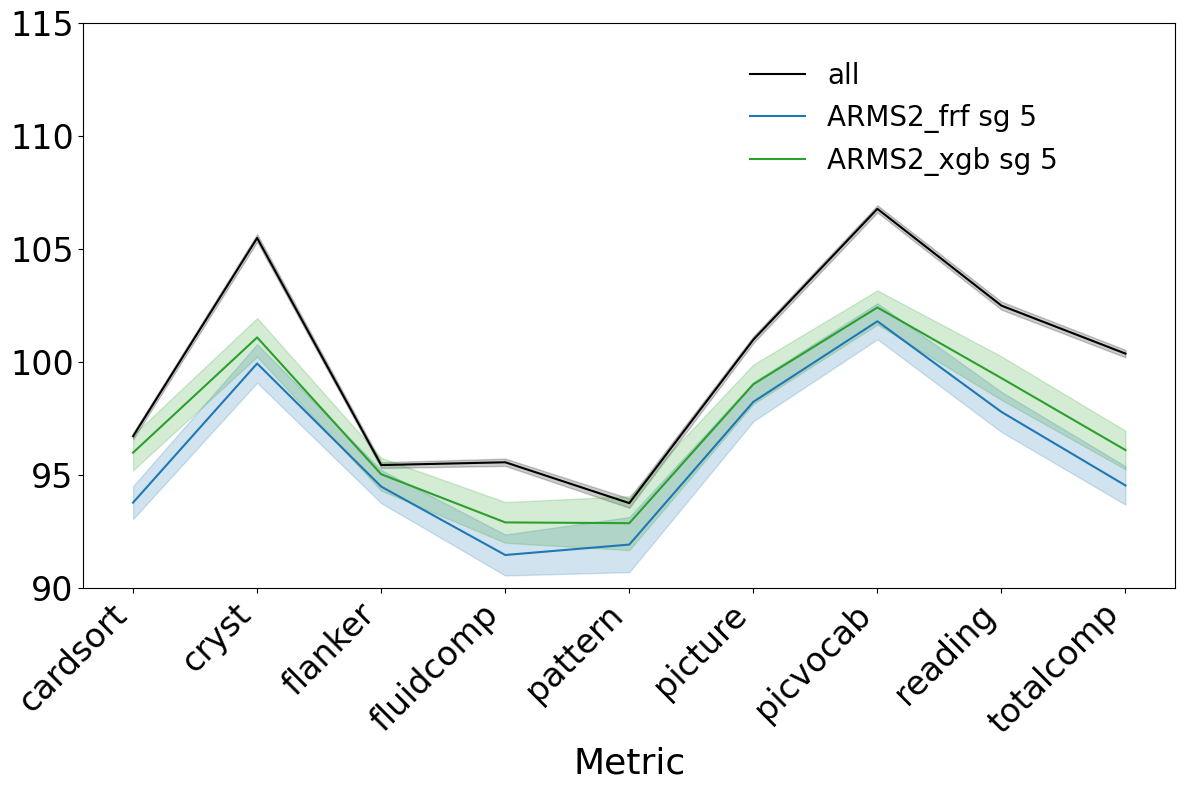

In [465]:
if df_for_plot is not None:
    
    colors = list(mcolors.TABLEAU_COLORS.values())
    color_values = {'all': 'black'}
    for i, (arm, community) in enumerate(df_for_plot.groupby(['arm', 'community']).groups.keys()):
        if community != 'all':
            color_values[f"ARMS{arm} sg {community}"] = colors[i % len(colors)]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each community
    for (arm, community), group in df_for_plot.groupby(['arm', 'community']):
        color_key = f"ARMS{arm} sg {community}"
        if community == 'all':
            color = 'black'
            label = 'all'
        else:
            color = color_values.get(color_key, 'gray')
            label = color_key
        plt.plot('metric', 'mean', data=group, color=color, label=label)
        plt.fill_between('metric', 'mean-se', 'mean+se', data=group, color=color, alpha=0.2)
    
    # Customize the plot
    plt.xlabel('Metric', fontsize=26)
    #plt.ylabel('Average', fontsize=26)
    #ylim for temp 2,14
    #ylim for cog 90.0,115.0
    plt.ylim(bottom=90, top=115)
    #plt.title('Cognitive Profiles for high ADHD proportion subgroups within ARMS2xgb, Working Memory')
    plt.xticks(rotation=45, ha='right', fontsize=24)
    plt.yticks(fontsize=24)
    
    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    sorted_labels = sorted(by_label.keys(), key=lambda x: (x != 'all', x))
    sorted_handles = [by_label[label] for label in sorted_labels]
    sorted_labels = sorted_labels
    
    # Create the legend with the sorted handles and labels
    plt.legend(sorted_handles, sorted_labels, fontsize=20, loc=(0.6,0.71), frameon=False)
    
    plt.tight_layout()
    plt.savefig('/users/1/lundq163/projects_newhome/list_cog_5arms2xgb_flux.png', dpi=600, bbox_inches='tight')
    plt.show()

Font family: ['sans-serif']
Font name: DejaVu Sans


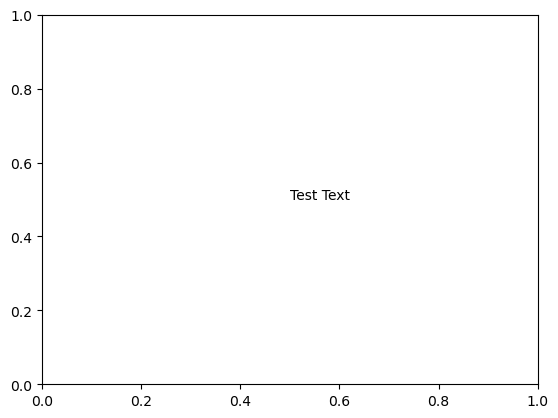

In [467]:
fig, ax = plt.subplots()
text = ax.text(0.5, 0.5, "Test Text")

print(f"Font family: {text.get_fontfamily()}")
print(f"Font name: {text.get_fontname()}")